___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (9,4)
pd.set_option('display.max_columns', 50)

In [3]:
df0 = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df0.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df = df0.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
sum(df.duplicated())

0

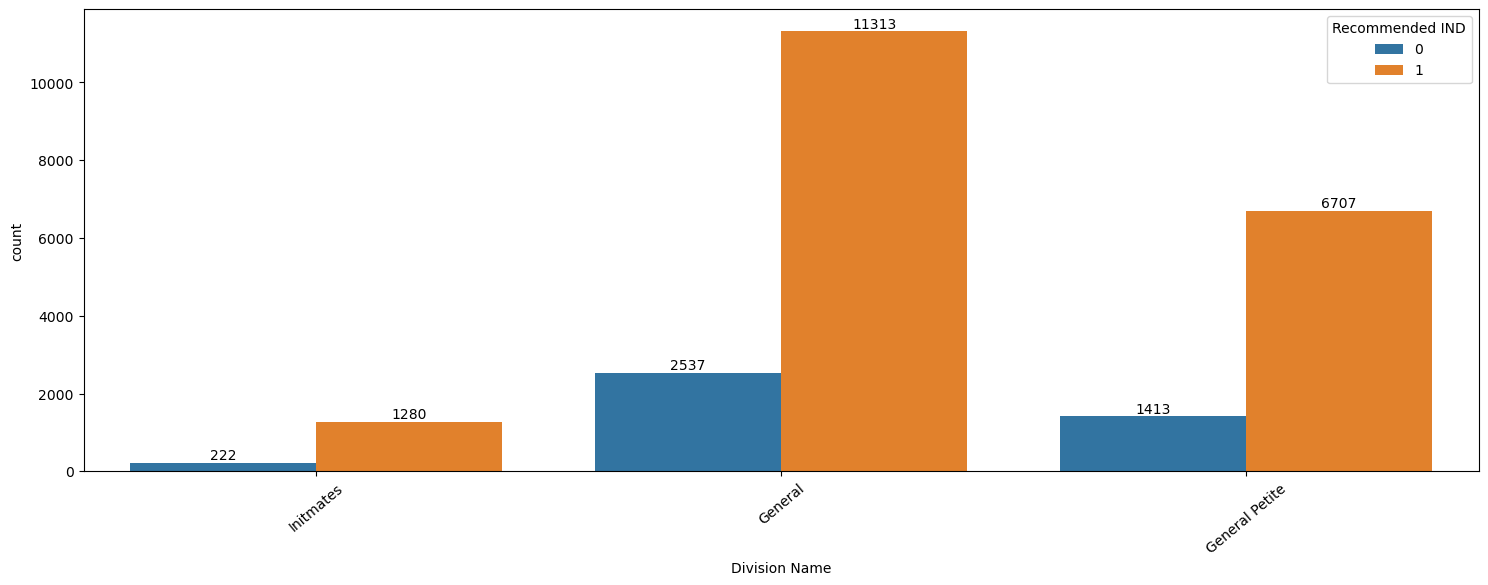

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data = df, x ="Division Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =40);

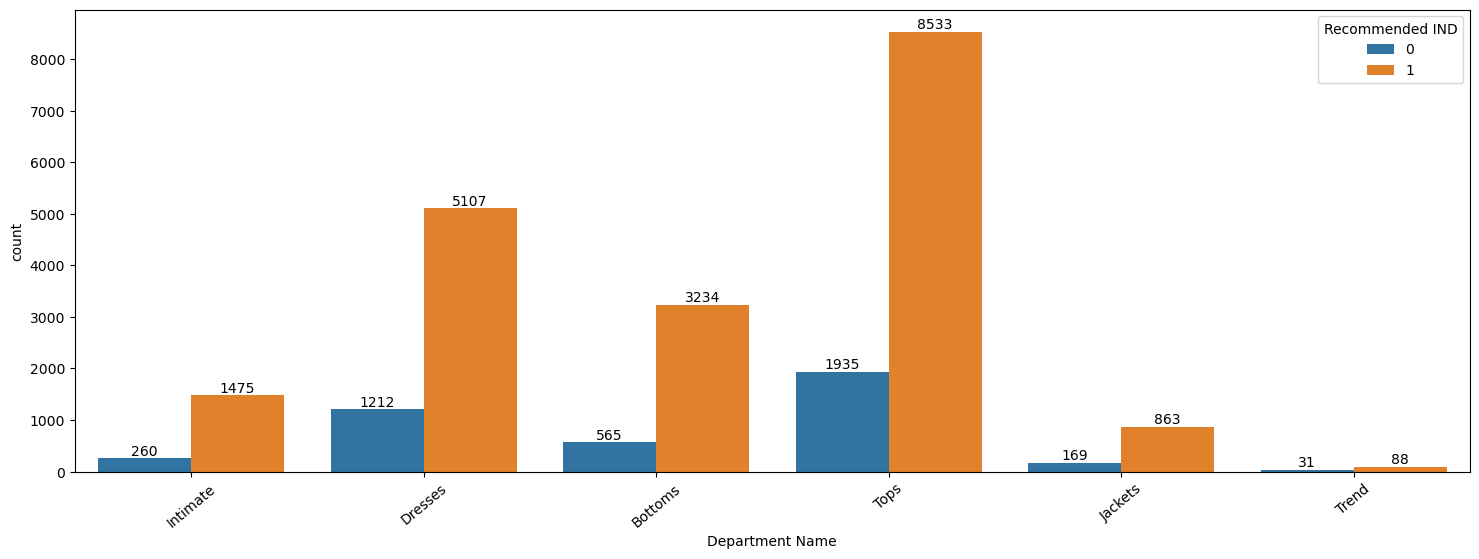

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data = df, x ="Department Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =40);

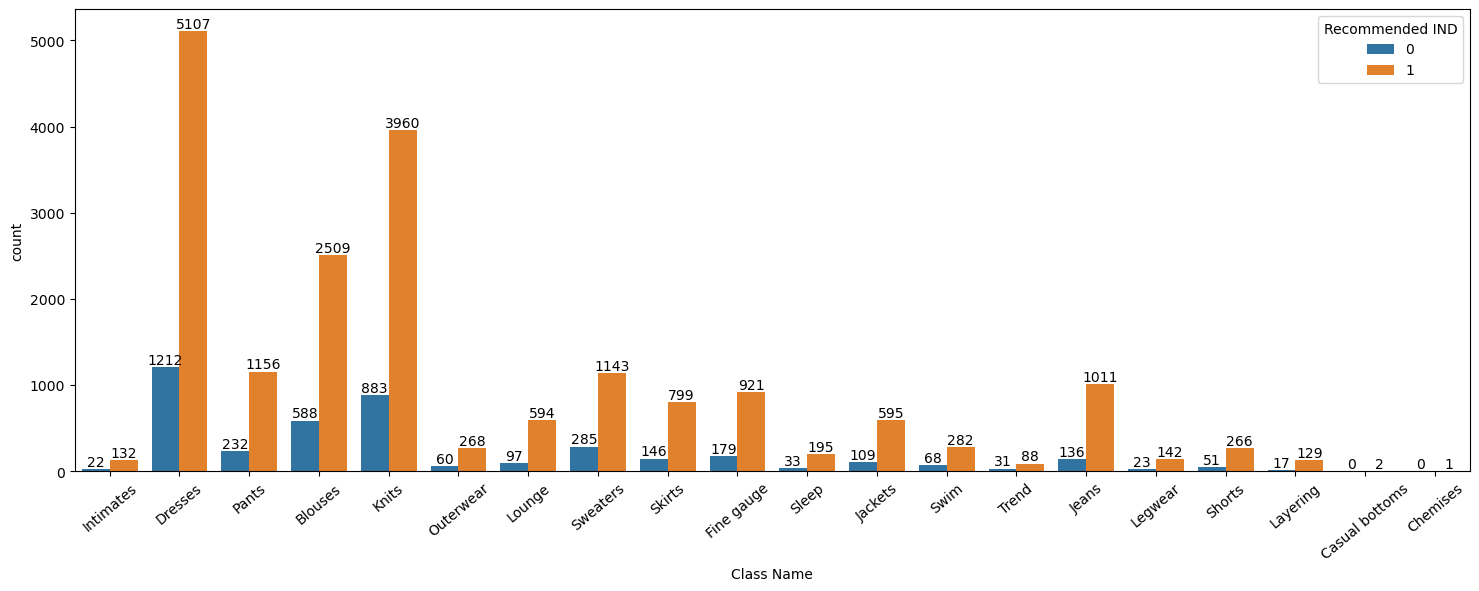

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data = df, x ="Class Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =40);

### Data Wrangling

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

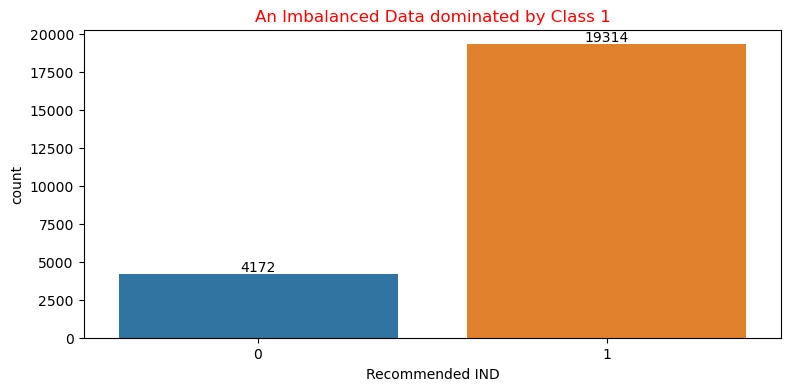

In [ ]:
# imbalanced data
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0])
plt.title("An Imbalanced Data dominated by Class 1", fontdict={"color": "red"});

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [5]:
df1 = df[["Review Text", "Recommended IND"]]
df1.head(2)

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1


In [6]:
df1.rename(columns={"Review Text":"review", "Recommended IND":"recommendation"}, inplace=True)

In [ ]:
df1.head(2)

,review,recommendation
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1


---
---


### Missing Value Detection

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          22641 non-null  object
 1   recommendation  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [ ]:
df1.isnull().sum()

review            845
recommendation      0
dtype: int64

In [ ]:
df1[df1["review"].isnull()].sample(5)

,review,recommendation
21418,NaN,1
1717,NaN,1
6437,NaN,1
8181,NaN,1
21814,NaN,1


In [ ]:
df1[df1["review"].isnull()]["recommendation"].value_counts()

recommendation
1    774
0     71
Name: count, dtype: int64

In [7]:
df1.dropna(inplace=True)


In [ ]:
df1.isnull().sum()

review            0
recommendation    0
dtype: int64

In [ ]:
df1.shape

(22641, 2)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [8]:
df2 = df1.copy()


In [9]:

# change the label for target class to 1
df2.recommendation = df2.recommendation.map({1:0, 0:1})

In [ ]:
df1.review[2000]

"The pleats on the bib make this look like something from chloe sevigny's wardrobe on the set of big love. and the shoulders are cut for an offensive lineman."

In [ ]:
df1[df1.review.str.contains("www")]

# her iki www'de ewww kelimesine ait

,review,recommendation
2380,"I have to say being a silk lover, decision was...",1
17503,I thought this dress looked so cute and comfor...,0


In [ ]:
df1.review[17503]

"I thought this dress looked so cute and comfortable and was excited to try it on, and i was majorly disappointed. it was incredibly unflattering, in every way. as a few of the other reviewers mentioned, if you have any sort of bust the dress will not hang nicely, the waist band was too high up and made me look pregnant. i'm 5'2 and curvy and usually take a lg in retailer, but this...ewww! i will say the color and material are gorgeous, but i'm guessing this is the type of dress that would look bes"

In [ ]:
df1[df1.review.str.contains("@")]

,review,recommendation
7547,I ordered this a little big because the smalle...,1
10254,I truly feel guilty wearing these outdoors. it...,1
12779,The metal detail @ the shoulders is the perfec...,1
16871,I ordered both a small and a medium because i ...,1
17084,"I am 5' and 3/4"" tall. too ""tall"" for most pet...",0
18472,"I ordered the black 2 months ago, it was on ba...",1
20471,Material is heavy enough to provide warmth on ...,1
21641,"While i love the fabric and the pattern, this ...",0
21944,Wow.. love this blazer! it's not as structured...,1


In [ ]:
df1[df1.review.str.contains("#")]

,review,recommendation
16,Material and color is nice. the leg opening i...,1
33,"I ordered this 3 months ago, and it finally ca...",0
79,This dress is adorable - it's a perfect casual...,1
111,I didn't end up keeping this dress...it just w...,1
116,Prior reviewer nailed it with the summary of t...,1
...,...,...
23298,This sweater looks heavy online bit is a very ...,1
23337,"I so wanted this top in red, and tried on the ...",1
23385,Soft florals on light as air chiffon layers--w...,1
23415,Love it! i am 125# and usually a size 2-4 or 2...,1


In [10]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [11]:
def cleaning(data):
    
    
    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #2. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #3. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
     
    #6. joining
    return " ".join( text_cleaned)



In [ ]:
cleaning_text = df1["review"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review, dtype: object

In [ ]:
# check them
cleaning_text[cleaning_text.str.contains("@")]

Series([], Name: review, dtype: object)

In [ ]:
cleaning_text[cleaning_text.str.contains("'")]

Series([], Name: review, dtype: object)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


In [ ]:
from wordcloud import WordCloud

### Detect Reviews (positive and negative separately)

In [ ]:
df_wordcloud = pd.concat([cleaning_text, df1.recommendation], axis=1)


### Collect Words (positive and negative separately)

In [ ]:
neg_wcloud = df_wordcloud[df_wordcloud.recommendation == 0]["review"]


In [ ]:
joined_negative = " ".join(neg_wcloud)
joined_negative[0:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

In [ ]:
pos_wcloud = df_wordcloud[df_wordcloud.recommendation == 1]["review"]
joined_positive = " ".join(pos_wcloud)
joined_positive[0:100]


'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

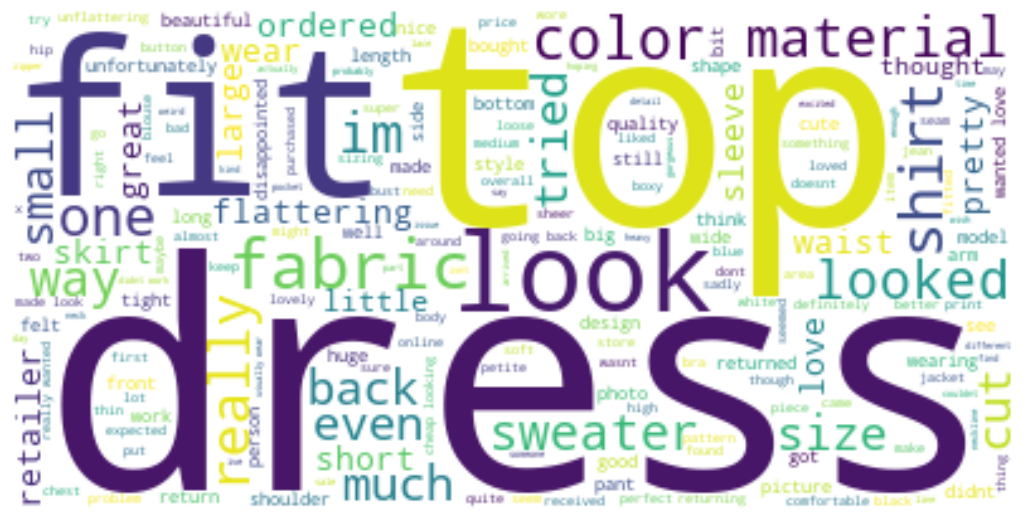

In [ ]:
# wordcloud for negative reviews
neg_wordcloud = WordCloud(background_color="white", max_words =250)
neg_wordcloud.generate(joined_negative)

import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


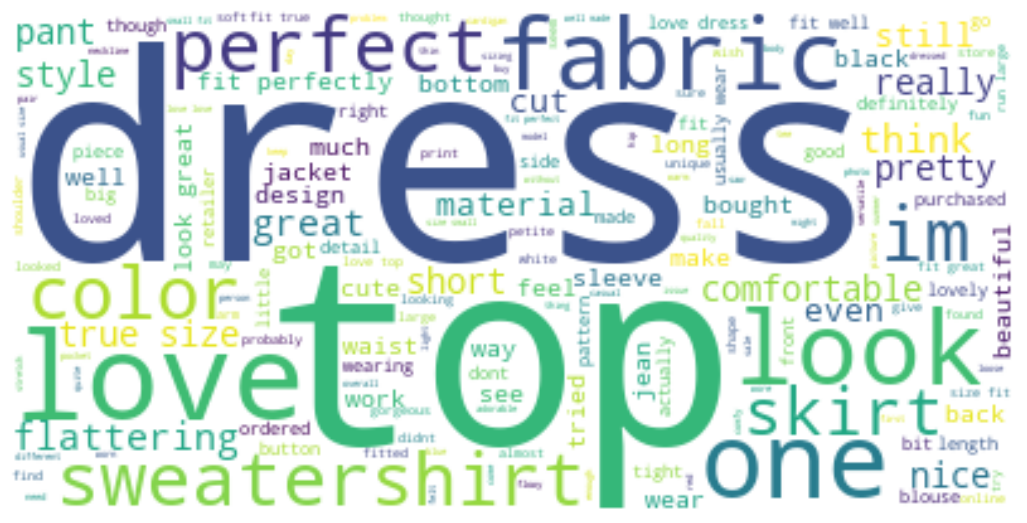

In [ ]:
# wordcloud for positive reviews
pos_wordcloud = WordCloud(background_color="white", max_words =250)
pos_wordcloud.generate(joined_positive)

import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [12]:
df2.head()


,review,recommendation
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


In [13]:
from sklearn.model_selection import train_test_split

X = df2["review"]
y = df2["recommendation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)


In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


In [15]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.9)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

### TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, max_df=0.9)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)


### Eval Function

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score


In [19]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))


## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.8, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

# C 0.01 recall 0.41
# c 0.02 recall 0.48


LogisticRegression(C=0.8, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3274  435]
 [ 158  662]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      3709
           1       0.60      0.81      0.69       820

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.80      4529
weighted avg       0.89      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     14831
           1       0.73      0.97      0.83      3281

    accuracy                           0.93     18112
   macro avg       0.86      0.94      0.89     18112
weighted avg       0.94      0.93      0.93     18112



In [ ]:
# overfitting kontrolu cv ile
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


model = LogisticRegression(C = 0.8, max_iter=1000, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


# hem class weight'siz hem class weightli farkli C degerleriyle log reg overfittingi engelleyemedi


test_score     0.867161
train_score    0.931243
dtype: float64

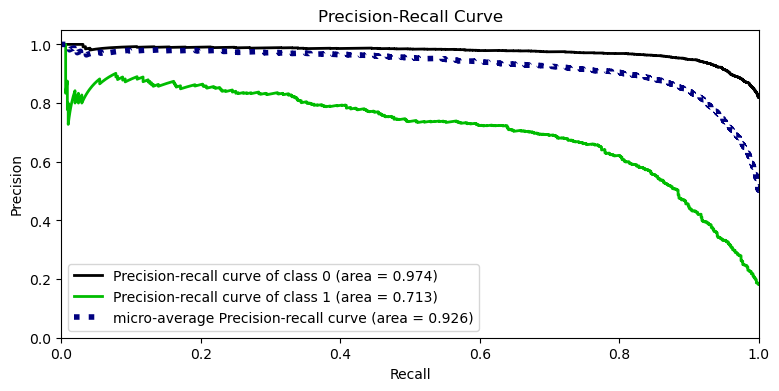

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall
model = LogisticRegression(C = 0.8, class_weight="balanced", max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
print(y_test.shape)
print(y_pred_proba.shape)

(4529,)
(4529, 2)


In [ ]:
from scikitplot.metrics import average_precision_score

y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred)
log_count_f1_neg = f1_score(y_test, y_pred)
log_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])


### TF-IDF

In [ ]:
log_tf = LogisticRegression(C=0.5, max_iter=1000, class_weight="balanced")
log_tf.fit(X_train_tf_idf,y_train)
# class weight balanced yapilmamis recall 0.58


LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG_TF_ITF MODEL")
eval(log_tf, X_train_tf_idf, X_test_tf_idf)


LOG_TF_ITF MODEL
[[3189  520]
 [ 107  713]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.87      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.62      0.92      0.74      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.90      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [ ]:
model = LogisticRegression(C=0.5, max_iter=1000, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.862081
train_score    0.883797
dtype: float64

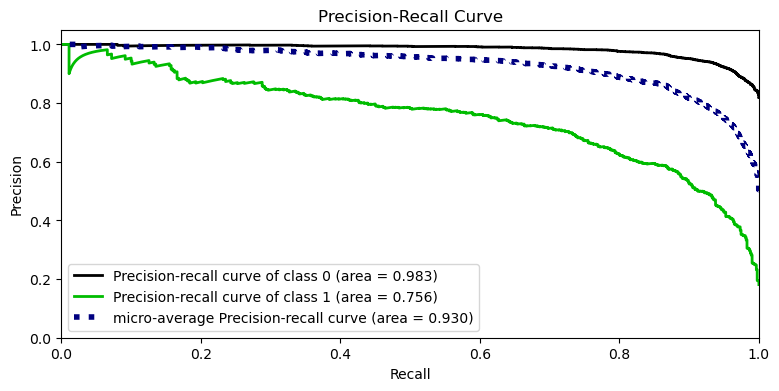

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.5, max_iter=1000, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = log_tf.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred)
log_tfidf_f1_neg = f1_score(y_test, y_pred)
log_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])


## Naive Bayes 

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model


In [ ]:
nb = MultinomialNB(alpha=1) # denemeler sonucu en iyi alpha 1. Bernoulli de denedim, multinomial daha iyi sonuc verdi
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1)

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)


NB MODEL
[[3381  328]
 [ 188  632]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.66      0.77      0.71       820

    accuracy                           0.89      4529
   macro avg       0.80      0.84      0.82      4529
weighted avg       0.90      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.69      0.82      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.87      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [ ]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.882288
train_score    0.902962
dtype: float64

**class weight balanced for naive bayes**

In [ ]:
from sklearn.utils import class_weight

sample = class_weight.compute_sample_weight('balanced', y_train)


In [ ]:
nb_balanced = MultinomialNB(alpha=2.5) # denemeler sonucu en iyi alpha 1. Bernoulli de denedim, multinomial daha iyi sonuc verdi
nb_balanced.fit(X_train_count,y_train, sample_weight=sample)

MultinomialNB(alpha=2.5)

In [ ]:
print("NB MODEL")
eval(nb_balanced, X_train_count, X_test_count)

NB MODEL
[[3140  569]
 [ 101  719]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      3709
           1       0.56      0.88      0.68       820

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14831
           1       0.60      0.91      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [ ]:
model = MultinomialNB(alpha=2.5)
scores = cross_validate(model, X_train_count, y_train, cv = 10, return_train_score=True,
                       fit_params={'sample_weight': sample})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.855676
train_score    0.873669
dtype: float64

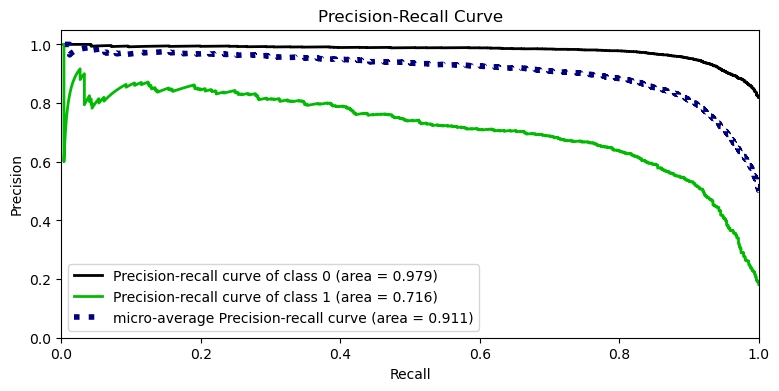

In [ ]:
# imbalanced data icin Precision recall
model = MultinomialNB(alpha=2.5)

model.fit(X_train_count, y_train, sample_weight=sample)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
# skorlari kaydedelim en son karsilastirmak icin
nb_count_rec_neg = recall_score(y_test, y_pred)
nb_count_f1_neg = f1_score(y_test, y_pred)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])


### TF-IDF

In [ ]:
nb_tf = MultinomialNB(alpha=10)
nb_tf.fit(X_train_tf_idf,y_train, sample_weight=sample)


MultinomialNB(alpha=10)

In [ ]:
print("NB MODEL")
eval(nb_tf, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3070  639]
 [  90  730]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      3709
           1       0.53      0.89      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.86      0.78      4529
weighted avg       0.89      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     14831
           1       0.56      0.91      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.88      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [ ]:
model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_tf_idf, y_train, cv = 10, return_train_score=True,
                       fit_params={'sample_weight': sample})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_score     0.842812
train_score    0.855841
dtype: float64

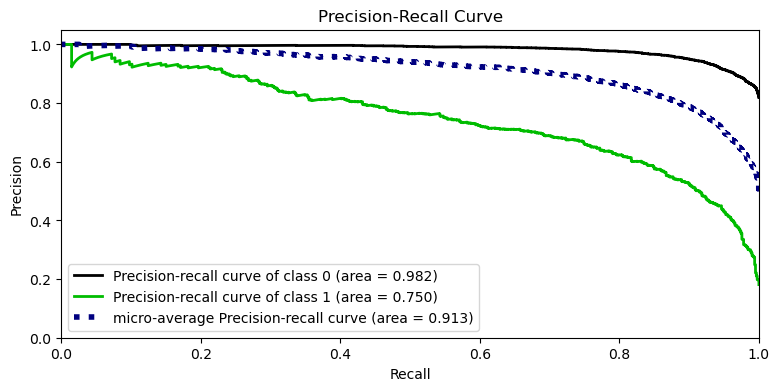

In [ ]:
model = MultinomialNB(alpha=10)

model.fit(X_train_tf_idf, y_train, sample_weight=sample)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb_tf.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred)
nb_tfidf_f1_neg = f1_score(y_test, y_pred)
nb_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])


## Support Vector Machine (SVM)

### Countvectorizer

In [20]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.0005, class_weight="balanced")
svc.fit(X_train_count,y_train)


LinearSVC(C=0.0005, class_weight='balanced')

In [21]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)


SVC MODEL
[[3098  611]
 [ 124  696]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      3709
           1       0.53      0.85      0.65       820

    accuracy                           0.84      4529
   macro avg       0.75      0.84      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     14831
           1       0.55      0.88      0.68      3281

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [24]:
model = LinearSVC(C=0.0005, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_score     0.836959
train_score    0.847308
dtype: float64

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

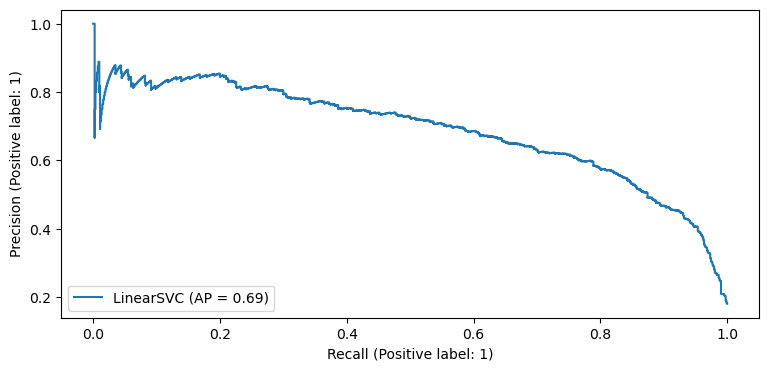

In [25]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    svc, X_test_count, y_test
)

In [ ]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred)
svc_count_f1_neg = f1_score(y_test, y_pred)
svc_AP_neg = average_precision_score(y_test, decision_function)


### TD-IDF

In [26]:
svc = LinearSVC(C=0.001, class_weight="balanced") # c =.1 ile overfittingi giderebildik
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.001, class_weight='balanced')

In [27]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3022  687]
 [ 126  694]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      3709
           1       0.50      0.85      0.63       820

    accuracy                           0.82      4529
   macro avg       0.73      0.83      0.76      4529
weighted avg       0.88      0.82      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     14831
           1       0.52      0.87      0.65      3281

    accuracy                           0.83     18112
   macro avg       0.74      0.84      0.77     18112
weighted avg       0.88      0.83      0.84     18112



In [28]:
model = LinearSVC(C=0.001, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.823156
train_score    0.828886
dtype: float64

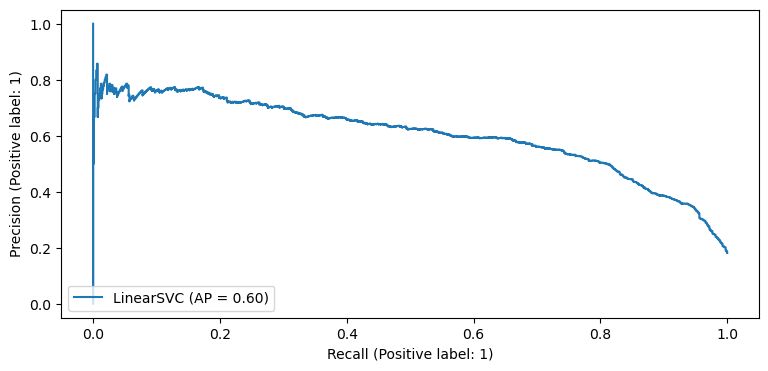

In [29]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    svc, X_test_count, y_test
)

In [ ]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred)
svc_tfidf_f1_neg = f1_score(y_test, y_pred)
svc_tfidf_AP_neg = average_precision_score(y_test, decision_function)


## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced") # class_weight="balanced"
# trial-error sonucu 100 agac sayisi ve 5 max_depth ile en iyi skorlari aldim
rf.fit(X_train_count, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2951  758]
 [ 151  669]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      3709
           1       0.47      0.82      0.60       820

    accuracy                           0.80      4529
   macro avg       0.71      0.81      0.73      4529
weighted avg       0.86      0.80      0.82      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     14831
           1       0.50      0.85      0.63      3281

    accuracy                           0.82     18112
   macro avg       0.73      0.83      0.76     18112
weighted avg       0.88      0.82      0.84     18112



In [ ]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_score     0.813384
train_score    0.825309
dtype: float64

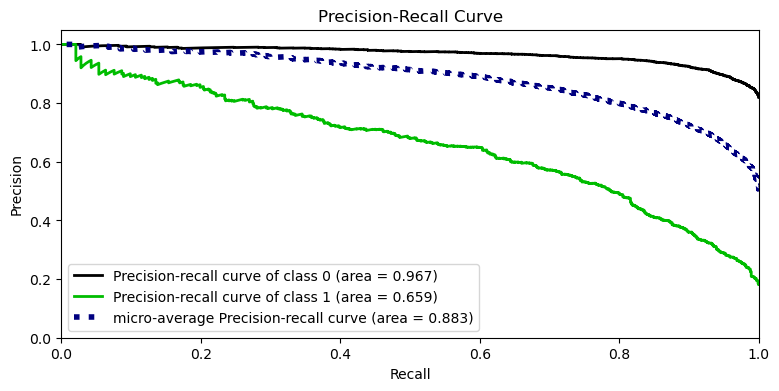

In [ ]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred)
rf_count_f1_neg = f1_score(y_test, y_pred)
rf_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])


### TF-IDF

In [ ]:
rf = RandomForestClassifier(100, max_depth=4, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2921  788]
 [ 163  657]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3709
           1       0.45      0.80      0.58       820

    accuracy                           0.79      4529
   macro avg       0.70      0.79      0.72      4529
weighted avg       0.86      0.79      0.81      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     14831
           1       0.49      0.86      0.62      3281

    accuracy                           0.81     18112
   macro avg       0.72      0.83      0.75     18112
weighted avg       0.88      0.81      0.83     18112



In [ ]:
model = RandomForestClassifier(100, max_depth=4, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.794226
train_score    0.810807
dtype: float64

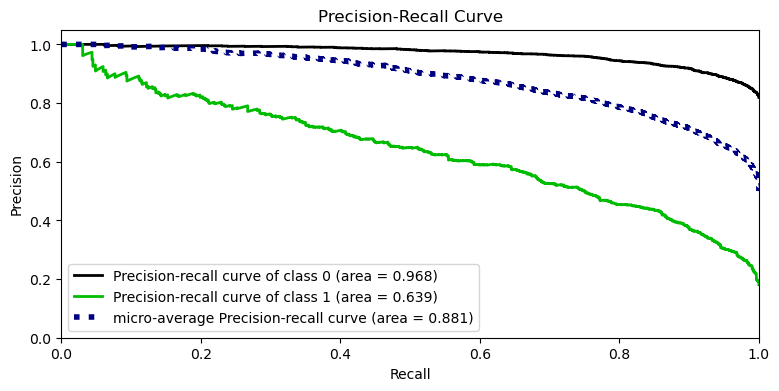

In [ ]:
model = RandomForestClassifier(100, max_depth=4, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred)
rf_tfidf_f1_neg = f1_score(y_test, y_pred)
rf_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])


## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 400, learning_rate=1.70, random_state = 42)
# denemeler sonucu en iyi n_est 400 ve lr: 1.70
ada.fit(X_train_count, y_train)


AdaBoostClassifier(learning_rate=1.7, n_estimators=400, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3420  289]
 [ 336  484]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3709
           1       0.63      0.59      0.61       820

    accuracy                           0.86      4529
   macro avg       0.77      0.76      0.76      4529
weighted avg       0.86      0.86      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14831
           1       0.72      0.64      0.67      3281

    accuracy                           0.89     18112
   macro avg       0.82      0.79      0.80     18112
weighted avg       0.88      0.89      0.89     18112



In [ ]:
model = AdaBoostClassifier(n_estimators= 400, learning_rate=1.70, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.864124
train_score    0.889527
dtype: float64

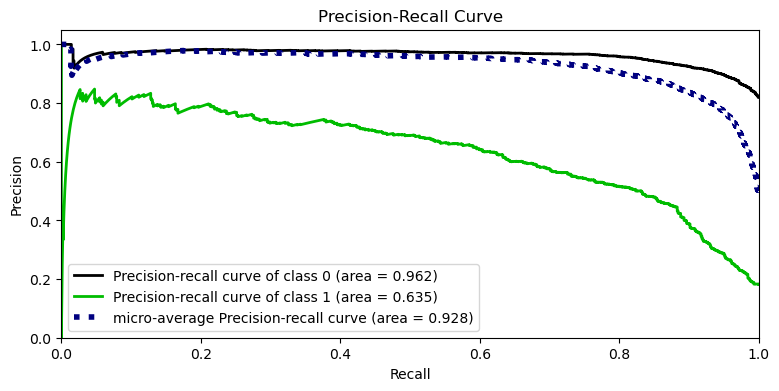

In [ ]:
model = AdaBoostClassifier(n_estimators= 400, learning_rate=1.65, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred)
ada_count_f1_neg = f1_score(y_test, y_pred)
ada_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])


## **TF-IDF**

In [ ]:
ada = AdaBoostClassifier(n_estimators= 150, learning_rate=1, random_state = 42)
ada.fit(X_train_tf_idf, y_train)


AdaBoostClassifier(learning_rate=1, n_estimators=150, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3517  192]
 [ 369  451]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3709
           1       0.70      0.55      0.62       820

    accuracy                           0.88      4529
   macro avg       0.80      0.75      0.77      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     14831
           1       0.75      0.58      0.65      3281

    accuracy                           0.89     18112
   macro avg       0.83      0.77      0.79     18112
weighted avg       0.88      0.89      0.88     18112



In [ ]:
model = AdaBoostClassifier(n_estimators= 150, learning_rate=1, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_score     0.870141
train_score    0.890942
dtype: float64

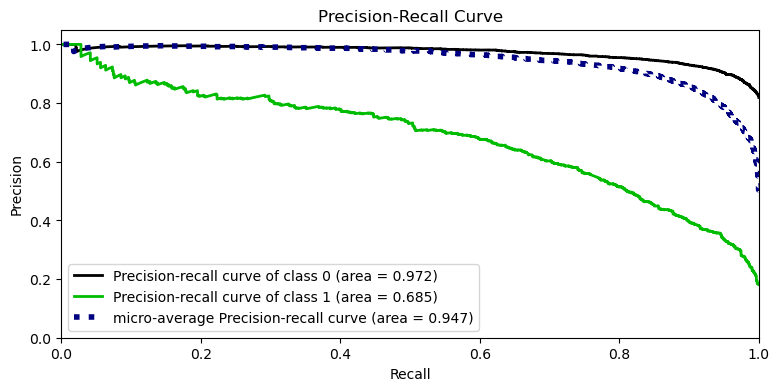

In [ ]:
model = AdaBoostClassifier(n_estimators= 150, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred)
ada_tfidf_f1_neg = f1_score(y_test, y_pred)
ada_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])


## DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout # GRU scores are better than LSTM for this data and it's faster.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
print(X.shape)
y.shape

(22641,)


(22641,)

### Tokenization

In [ ]:
num_words = 15001

tokenizer = Tokenizer(num_words=num_words,)


In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

# word_index corpustaki tokenleri kullanım sıklıklarına göre sıralar.


{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
# unique token sayisi
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)


In [ ]:
# check a sample
X[:2]

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
Name: review, dtype: object

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)


# öncelikle corpustaki tüm yorumların boyutlarını bir liste içine alıp num_tokens değişkenine atıyoruz. 
# Aggrigation fonksiyonlarını pratik bir şekilde arreylere uygulanabildiği için listeyi arreye dönüştürüyoruz.

In [ ]:
num_tokens

# her bir yorumun/documentin kaç tokenden oluştuğunu görüyoruz.

array([ 7, 62, 97, ..., 42, 85, 19])

In [ ]:
num_tokens.mean()

# tüm yorum boyutlarının ortalamsını alıyoruz. 

60.60699615741354

In [ ]:
num_tokens.max()

116

In [ ]:
max_tokens = 105

sum(num_tokens <= max_tokens) / len(num_tokens)

0.9840554745815114

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre") 

# pad_sequences fonksiyonu içine yorumların numeric versiyonları ve sabitleneceği uzunluk (maxlen) verilerek tüm yorumlar 105 tokene sabitleniyor.

In [ ]:
X_pad.shape

(22641, 105)

### Train Set Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)
# tum yorumlari sabitledigimiz, numeric versiyona donusturdugumuz ve 105 tokene sabitledigimiz x_pad'i train ve test olarak ayiralim 



### Modeling

In [ ]:
# build a sequential model
model = Sequential()

In [ ]:
# embedding size belirle
embedding_size = 50


In [ ]:
model.add(Embedding(input_dim=num_words, # numarasi sadece 15k'ya olan kadaralara islem yap
                    output_dim=embedding_size, # tum tokenleri 50 boyutlu bir word embeddinge donusturecek
                    input_length=max_tokens)) # modele verilen her bir yorumun uzunlugu max 105 olacak
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True)) # best practice embedding layerla ilk layerda ayni unit oldugundan 50 verdik
model.add(Dropout(0.2)) 

model.add(GRU(units=25, return_sequences=True)) 
model.add(Dropout(0.2))
# sonraki layer GRU layer olduğundan return_sequences=True olarak düzenledik.

model.add(GRU(units=12, return_sequences=False))
# sonraki layer dense layer olduğundan return_sequences=False olarak düzenledik.

model.add(Dense(1, activation='sigmoid')) # binary classification 


In [ ]:
optimizer = Adam(learning_rate=0.003) # modelde kullanilacak olan gradient descent algoritmasi. Adam genelde daha iyi sonuclar verir
# overfittinge karsi en etkin yontemleerden birisi lr; default 0.001; 0.005 ile deneme yanilmayla en iyi skorlari elde ettik

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=['Recall']) 


In [ ]:
model.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 105, 50)           750050    
                                                                 
 dropout_18 (Dropout)        (None, 105, 50)           0         
                                                                 
 gru_18 (GRU)                (None, 105, 50)           15300     
                                                                 
 dropout_19 (Dropout)        (None, 105, 50)           0         
                                                                 
 gru_19 (GRU)                (None, 105, 25)           5775      
                                                                 
 dropout_20 (Dropout)        (None, 105, 25)           0         
                                                                 
 gru_20 (GRU)                (None, 12)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           patience = 1, restore_best_weights=True)

In [ ]:
df2.recommendation.value_counts(normalize=True)

recommendation
0    0.818868
1    0.181132
Name: proportion, dtype: float64

In [ ]:
weights = {0:0.181132, 1:0.818868}

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=256, class_weight=weights, validation_data=(X_test, y_test), callbacks=[early_stop]) 

Epoch 1/10
80/80 [==============================] - 34s 348ms/step - loss: 0.1529 - recall: 0.7627 - val_loss: 0.4168 - val_recall: 0.9122
Epoch 2/10
80/80 [==============================] - 27s 332ms/step - loss: 0.0930 - recall: 0.8970 - val_loss: 0.3172 - val_recall: 0.8805


### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()


,loss,recall,val_loss,val_recall
0,0.152863,0.762666,0.416785,0.912195
1,0.092963,0.897047,0.317224,0.880488


<Axes: >

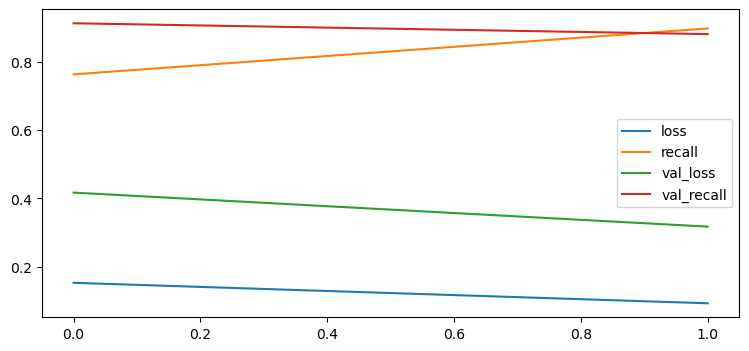

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 2s 26ms/step - loss: 0.4168 - recall: 0.9122


[0.41678497195243835, 0.9121951460838318]

In [ ]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 17s 27ms/step - loss: 0.3831 - recall: 0.9325


[0.38311371207237244, 0.932538628578186]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))


71/71 [==============================] - 3s 27ms/step
[[1475  380]
 [  36  374]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1855
           1       0.50      0.91      0.64       410

    accuracy                           0.82      2265
   macro avg       0.74      0.85      0.76      2265
weighted avg       0.89      0.82      0.83      2265



In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 16s 25ms/step
[[13528  3157]
 [  249  3442]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     16685
           1       0.52      0.93      0.67      3691

    accuracy                           0.83     20376
   macro avg       0.75      0.87      0.78     20376
weighted avg       0.90      0.83      0.85     20376



71/71 [==============================] - 2s 28ms/step


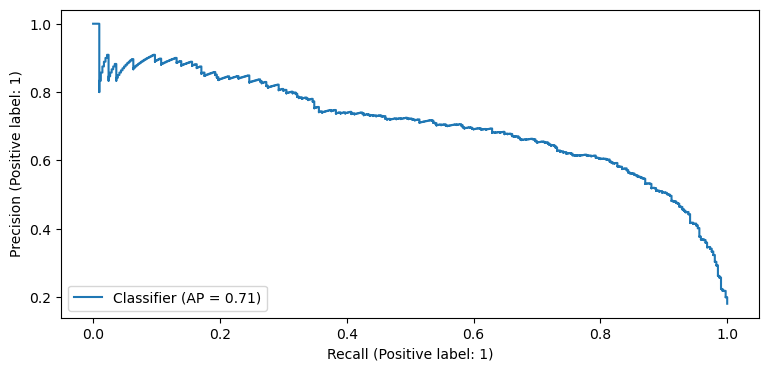

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7064192387970355

In [ ]:
y_pred_proba = model.predict(X_test)
DL_rec_neg = recall_score(y_test, y_pred)
DL_f1_neg = f1_score(y_test, y_pred)
DL_AP_neg = average_precision_score(y_test, y_pred_proba)

71/71 [==============================] - 2s 29ms/step


## BERT Modeling

In [2]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
strategy = tf.distribute.TPUStrategy(resolver)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Kullanacagim pre-trained model

# from transformers import BertTokenizer, TFBertModel
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = TFBertModel.from_pretrained("bert-base-uncased")

# https://huggingface.co/bert-base-uncased
 

### Read Data

In [58]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df0 = pd.read_csv('/content/drive/MyDrive/NLP/Womens Clothing E-Commerce Reviews.csv')
df0.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [59]:
df = df0.copy()
df = df[["Review Text", "Recommended IND"]]

In [60]:
df.rename(columns={"Review Text":"review", "Recommended IND":"recommendation"}, inplace=True)

In [61]:
df.dropna(inplace=True)
df.isnull().sum()

review            0
recommendation    0
dtype: int64

In [62]:
df.recommendation = df.recommendation.map({1:0, 0:1})

# our target class is negative comments; thus we change the label and make negative reviews 1 class

In [63]:
X = df['review'].values # values converts the series to arrays. ML and DL models work faster and better with arrays.
y = df['recommendation'].values

### Train test split

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [13]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.3 MB/s eta 0:00:00


In [65]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


### Fixing token counts of all documents

In [66]:
# en uzun tokeni bul
# For every sentence...
number_tokens_sentences = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))
# max 512 token alir model; max 162 oldugu icin bilgi kaybina yol acmamak icin bununla devam edebiliriz

Max sentence length:  162


### Transformation Vectors to Matrices

In [67]:
# asa.ki fonk ile her yourumu ilk 3 embeddingse donnusturup sonra input ve attention mask'i cekecegiz bir for loop ile
def transformation(X):
  # set array dimensions
  seq_len = 162

  # input_ids'ler için Xids boş listesini, attention_mask'ler için Xmask boş listesini oluşturuyoruz.
  Xids = []
  Xmask = []

    
  for sentence in X: # corpustan tüm yorumları sırayla çekiyoruz.

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # her bir yoruma karşılık gelen input_ids vektörünü Xids listesine append ediyoruz.
      Xmask.append(tokens['attention_mask']) # her bir yoruma karşılık gelen attention_mask vektörünü Xmask append ediyoruz.

  return np.array(Xids), np.array(Xmask) # Xids ve Xmask matrixlerini (yorum sayısı, 162) daha hızlı çalışları için np.array formatına dönüştürüyoruz.

In [68]:
Xids_train, Xmask_train = transformation(X_train)

# Train setimiz için 2 ayrı matriximizi düzenliyoruz.

Xids_test, Xmask_test = transformation(X_test)
# Test setimiz için de 2 ayrı matriximizi düzenliyoruz.

# inputlarimiz artik tek bir degiskenle degil, 2 ayri matrisle belirtiliyor. 

In [69]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [70]:
labels_train = y_train.reshape(-1,1)
labels_train

# BERT modelleri target'ı da bir matrix olarak ister. Bu sebeple y_train targetımızı (len(y_train), 1) boyutunda bir matrix'e dönüştürüyoruz.

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [71]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [72]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

# Datayı BERT modellerine vermeden önceki son aşama yukarıda elde ettiğimiz matrixleri gruplandırılmış Tensorflow tensörlerine dönüştürmektir.

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [73]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

# Train datasına yaptığımız gibi test datası için de 3 ayrı matrix'mizi gruplandırılmış Tensorflow tensörlerine dönüştüreceğiz.

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [74]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels
  
# Yukarıda elde ettiğimiz tensörlerden hangisi 'input_ids' hangisi 'attention_mask' ve hangisi labels model bunları bilemez. Bu sebeple
# bu bilgiyi bizim modele sağlamamız gerekiyor. Bunun için yukarıdaki fonksiyonu tanımlıyoruz.

In [75]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func) 

In [26]:
# kontrol edelim
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [27]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [76]:
batch_size = 32

# BERT modeli geliştiren developerlar tarafından batch_size olarak 16 ve 32 sayıları tavsiye edilmiştir.

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [29]:
# check it
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

### Creating optimization

In [30]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 12.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal

In [77]:
from official.nlp import optimization  
epochs = 3 
#batch_size = 32
steps_per_epoch = len(train_ds) # steps_per_epoch: her epochta kac 32li paket modele beslenecek.

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5  # best practice bu 3ünden biridir. datamiz kucuk oldugu icin en kucuk adimlarla baslayalim
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')  # nlp'de kendine ait optimizerlar vardir daha iyi sonuc veren, bu nedenle 
                                          # yukarda nlp officiali indirip burdan optimizeri import ettik ve bunlardan adamw isimli farkli
                                          # bir optimizer kullaniyoruz

### Creating Model with TPU

In [78]:
def create_model():
    from transformers import TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFBertModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] 
    # pooler output, pre-trained modelin tokenleri hafizasinda tuttugu layer. burdaki embeddingsleri asagidaki dene layera aktaracagiz

    x = Dense(162, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x) #0.1 oranı developerlar tarafından tavsiye edilen orandır. 
    y = Dense(1, activation='sigmoid', name='outputs')(x) 


    return Model(inputs=[input_ids, attention_mask], outputs=y)
    # son aşamada elde ettiğimiz input ve outputlar Model fonksiyonu içine tanımlanır.

In [79]:
# strategy değişkenine atanan 8 TPU çekirdeğinin hızından faydalanarak yapmak istediğimiz tüm işlemleri with strategy.scope() kod bloğunun 
# altında tanımlıyoruz.

with strategy.scope():

  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall

  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()  

model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [80]:
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                         

### Model Fiting

In [81]:
# class_weights mevcut haliyle train 91 test 82 recall; train 91 test 81 precision skoru aldim
# bir de class weighti biraz daha balanced yaparak deneyelim. 
# deneme sonucu skorlar 50lere kadar dustugu icin mevcut haliyle class weight olmadan modeli tekrar buid edecegim

In [82]:
# pd.Series(y).value_counts(normalize=True)

In [83]:
# weights = {0:0.30, 1:0.70}

In [84]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)


Epoch 1/3
637/637 [==============================] - 206s 193ms/step - loss: 0.6008 - recall_3: 0.7814 - val_loss: 0.5759 - val_recall_3: 0.8000
Epoch 2/3
637/637 [==============================] - 68s 106ms/step - loss: 0.4839 - recall_3: 0.8553 - val_loss: 0.4059 - val_recall_3: 0.7976
Epoch 3/3
637/637 [==============================] - 68s 106ms/step - loss: 0.4209 - recall_3: 0.8775 - val_loss: 0.4795 - val_recall_3: 0.8220


### Model evaluation

In [85]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall_3,val_loss,val_recall_3
0,0.600750,0.781360,0.575875,0.800000
1,0.483881,0.855324,0.405949,0.797561
2,0.420937,0.877540,0.479456,0.821951


<Axes: >

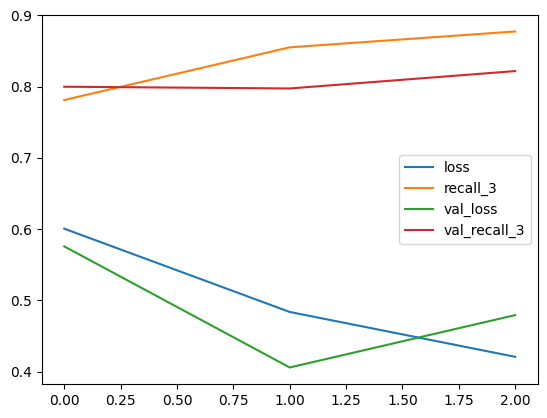

In [86]:
model_loss.plot()

In [87]:
model3.evaluate(train_ds)

637/637 [==============================] - 29s 42ms/step - loss: 0.2395 - recall_3: 0.8900


[0.23949268460273743, 0.8900027275085449]

In [88]:
model3.evaluate(val_ds)

71/71 [==============================] - 4s 34ms/step - loss: 0.4795 - recall_3: 0.8220


[0.47945624589920044, 0.8219512104988098]

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

71/71 [==============================] - 14s 102ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1855
           1       0.77      0.82      0.80       410

    accuracy                           0.92      2265
   macro avg       0.87      0.88      0.88      2265
weighted avg       0.93      0.92      0.92      2265



In [90]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred)) 

637/637 [==============================] - 24s 35ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16685
           1       0.89      0.89      0.89      3691

    accuracy                           0.96     20376
   macro avg       0.93      0.93      0.93     20376
weighted avg       0.96      0.96      0.96     20376



71/71 [==============================] - 3s 27ms/step


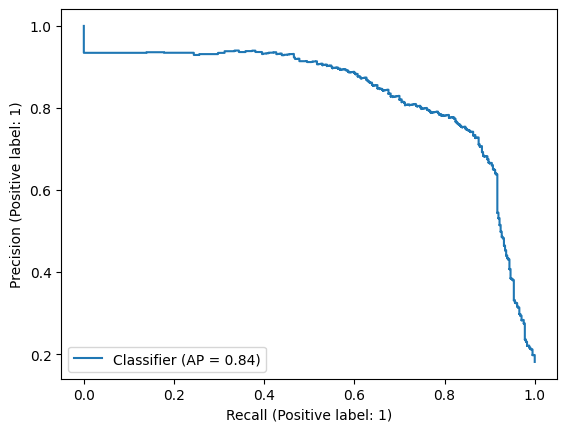

In [91]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [108]:
# asagida diger modellerinn skorlariyla karsilastirildiginda NLP tum model ve algoritmalardan daha iyi skorlar verdi. 
# Diger modellerden farkli olarak olumsuz yorumlari iceren 1 classi icin de oldukca yuksek skorlar verdi
# bu nedenle sonuc olarak en iyi skorlar veren model olarak nlp modeli kullanilcakatir.

model3.save_weights("/content/drive/MyDrive/NLP/women_cloth_sentiment_model.h5")

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["Deep_Learning","NaiveBayes_count", "LogReg_count",  "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf",  
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "SVM_count","SVM_tfidf"],
                        
                        "F1_Score_Negative": [DL_f1_neg, nb_count_f1_neg, log_count_f1_neg, 
                                             rf_count_f1_neg, ada_count_f1_neg, nb_tfidf_f1_neg, log_tfidf_f1_neg,
                                            rf_tfidf_f1_neg, ada_tfidf_f1_neg, svc_count_f1_neg, svc_tfidf_f1_neg], 
                        
                        "Recall_Score_Negative": [DL_rec_neg, nb_count_rec_neg, log_count_rec_neg, 
                                                  rf_count_rec_neg, ada_count_rec_neg, 
                                                  nb_tfidf_rec_neg, log_tfidf_rec_neg,  
                                                  rf_tfidf_rec_neg, ada_tfidf_rec_neg, svc_count_rec_neg, svc_tfidf_rec_neg],
                        
                        "Average_Precision_Score_Negative": [DL_AP_neg, nb_AP_neg, log_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, 
                                                            rf_tfidf_AP_neg, ada_tfidf_AP_neg, svc_AP_neg, svc_tfidf_AP_neg]})

compare

,Model,F1_Score_Negative,Recall_Score_Negative,Average_Precision_Score_Negative
0,Deep_Learning,0.642612,0.912195,0.706419
1,NaiveBayes_count,0.694593,0.869512,0.716143
2,LogReg_count,0.690662,0.807317,0.712881
3,Random Forest_count,0.595461,0.815854,0.658566
4,AdaBoost_count,0.607659,0.590244,0.634836
5,NaiveBayes_tfidf,0.666971,0.890244,0.749887
6,LogReg_tfidf,0.694593,0.869512,0.755872
7,Random Forest_tfidf,0.580132,0.801220,0.638593
8,AdaBoost_tfidf,0.616541,0.550000,0.684848
9,SVM_count,0.654443,0.848780,0.688606


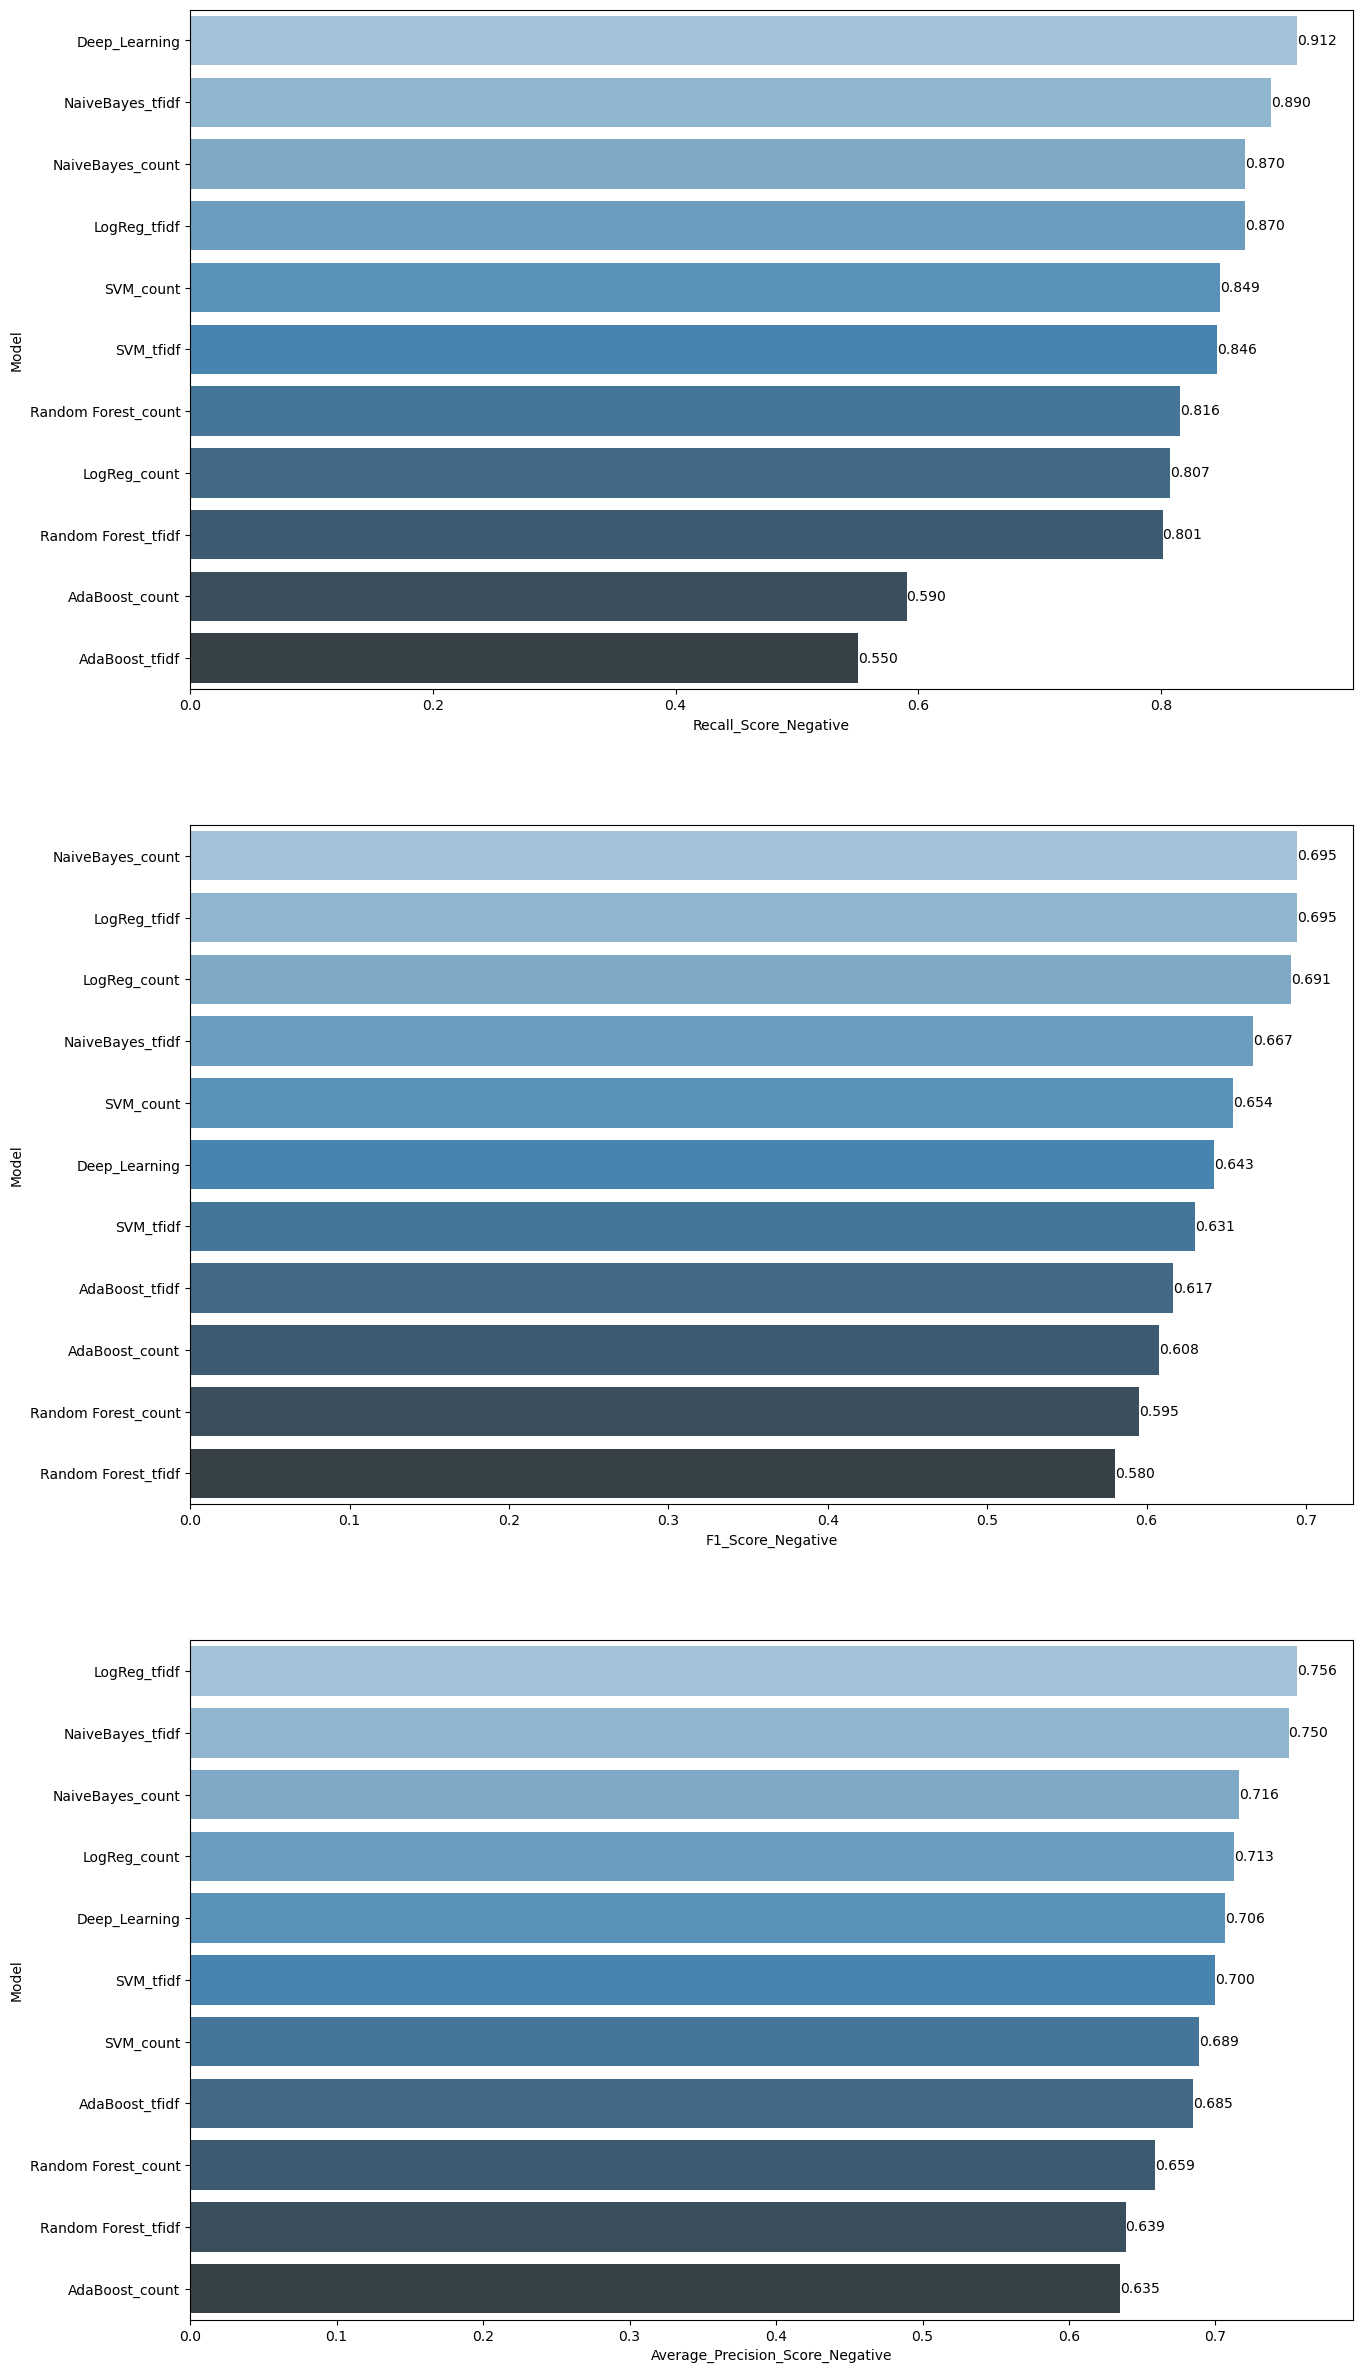

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")            
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### Conclusion

Model comparisondan hemen once gordugumuz uzere tum modeller icinde recall ve precision dengesini gozeterek, ayni zaman da overfittinge de izin vermeyerek en iyi sonuclari veren model NLP modeli oldu. Bu modelin agirliklarini woment_clothes_sentiment_model.h5 adi altinda kaydetmistik. modeli tekrar cagirmak istedigimizde asagidaki gibi cagirip prediction alinabilir

In [109]:
with strategy.scope():

  model4 = create_model()  # bu sifir bir model. best weightsi asagida yukluyoruz buna
  model4.load_weights("/content/drive/MyDrive/NLP/women_cloth_sentiment_model.h5")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [110]:
# biraz prediction alarak modelimizi test edelim ve bu projeyi oyle sonlandiralim

# train ve test datasının gruplandırılmış tensorflow tensörlerine dönüştürülme işlemlerinin aynısını sırasıyla predict edeceğimiz observationlara(obs) aynen uyguluyoruz.

def prep_data(text):
  import tensorflow as tf
  
  # 1. Predict edeceğimiz yeni gözlemleri öncelikle token embeddings (input_ids) ve attention_mask matrixlerine dönüştürüyoruz.
  #    Bu fonksiyonu kullanabilmek için öncelikle transformation funksiyonunu çalıştırmanız gerektiğini unutmayın.
  Xids_obs, Xmask_obs = transformation(text) 
  
  # 2. Xids_obs, Xmask_obs matrixlerimizi gruplandırılmış tenserflow tensörlerine dönüştürüyoruz.
  dataset_obs = tf.data.Dataset.from_tensor_slices((Xids_obs, Xmask_obs))
  
  # 3. Dönüştürdüğümüz gruplandırılmış tensorflow tensörlerini modelin tanıyabilmesi için "input_ids" ve "attention_mask" olarak isimlendiriyoruz.
  def map_func(Tensor_Xids, Tensor_Xmask):
       return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}
  
  dataset_obs = dataset_obs.map(map_func)

  # 4. Son aşama olarak gruplandırılmış tensorflow tensörlerimizi train datasında olduğu gibi 32'li paketler haline getiriyoruz. Yoksa shape uyumsuzluk hatası alırız. 
  batch_size = 32 # eğitim datasına uygulanan batch_size'ı uyguluyoruz.
  obs_ds = dataset_obs.batch(batch_size)

  return obs_ds 

In [111]:
review1 = "the short looked great on the photos but it's just horrible"
review2 = "great seller super product, many thanks"
review3 = "despite the shipping problems I am giving 5 stars to the seller bec of the product quality"
review4 = "it could be better"
review5 = "it sucks!"

reviews = [review1, review2, review3, review4, review5] 

In [112]:
obs_ds = prep_data(reviews)

# Datamızı gruplandırılmış tensorflow tensörlerine dönüştürüyoruz.

In [113]:
probs = model4.predict(obs_ds)
probs
# predictionlari alaalim

1/1 [==============================] - 25s 25s/step


array([[0.999997  ],
       [0.06386122],
       [0.06352586],
       [0.05839053],
       [0.99438155]], dtype=float32)

In [114]:
probs = [i[0] for i in probs]
probs

[0.999997, 0.06386122, 0.063525856, 0.058390528, 0.99438155]

In [115]:
classes  = (np.array(probs) >= 0.5).astype("int")
classes

array([1, 0, 0, 0, 1])

In [116]:
my_dict = {"Review":reviews, "prob":probs, "classes":classes}

In [117]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(my_dict)
# the model performs very well. Only problem is with the review 4, a negative review is labelled as positive by the model.

,Review,prob,classes
0,the short looked great on the photos but it's just horrible,0.999997,1
1,"great seller super product, many thanks",0.063861,0
2,despite the shipping problems I am giving 5 stars to the seller bec of the product quality,0.063526,0
3,it could be better,0.058391,0
4,it sucks!,0.994382,1


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___